## MOVIE LENS | USER BASED AND ITEM BASED COLLABORATIVE FILTERING

In [57]:
import pandas as pd 
# ratings = pd.read_csv("~/Desktop/ml-latest-small 3/ratings.csv")
# ratings.head()
# #ratings['rating']
# #len(df)

## Split the data into Train and Test data using Python 

In [139]:
#USING PYTHON - 
# import math
# from collections import defaultdict


# import pandas as pd
# import scipy as scipy
# import numpy as np
# from sklearn.model_selection import train_test_split

# ratings = pd.read_csv("~/Desktop/ml-latest-small 3/ratings.csv")
# print(ratings.head())
# sample_train, sample_test, sampleY_train, sampleY_test = train_test_split(ratings, ratings['rating'], test_size=0.999, random_state=42)
# len(sample_train['userId'].unique())

   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205


80

## Split the data into Training and Testing data sets using R 

/bin/sh: -c: line 0: syntax error near unexpected token `('
/bin/sh: -c: line 0: `[alt text](~/Desktop/project_images/a.png "Import Data to R")'


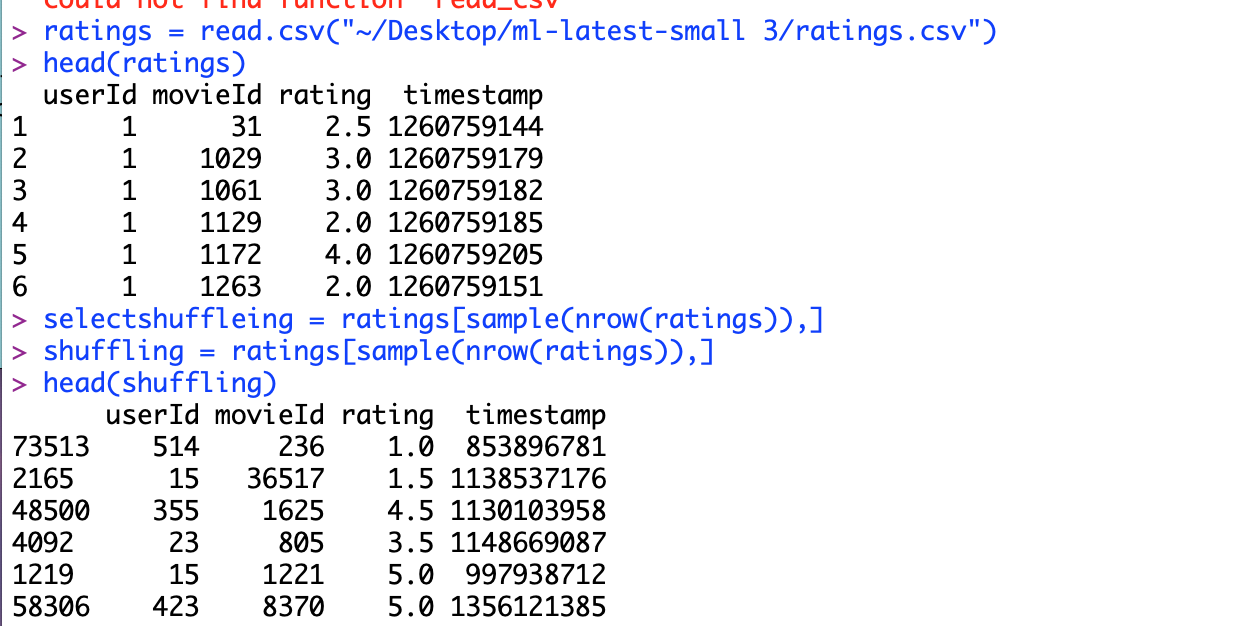

In [51]:
# from IPython.display import Image 
# Image(filename="~/Desktop/project_images/a.png", width = 300, height = 400)
# %%html
# <img src="~/Desktop/project_images/a.png",width=200,height=200>
![alt text](~/Desktop/project_images/a.png "Import Data to R")
from IPython.display import Image
Image(filename='project_images/a.png', width = 600, height = 600)


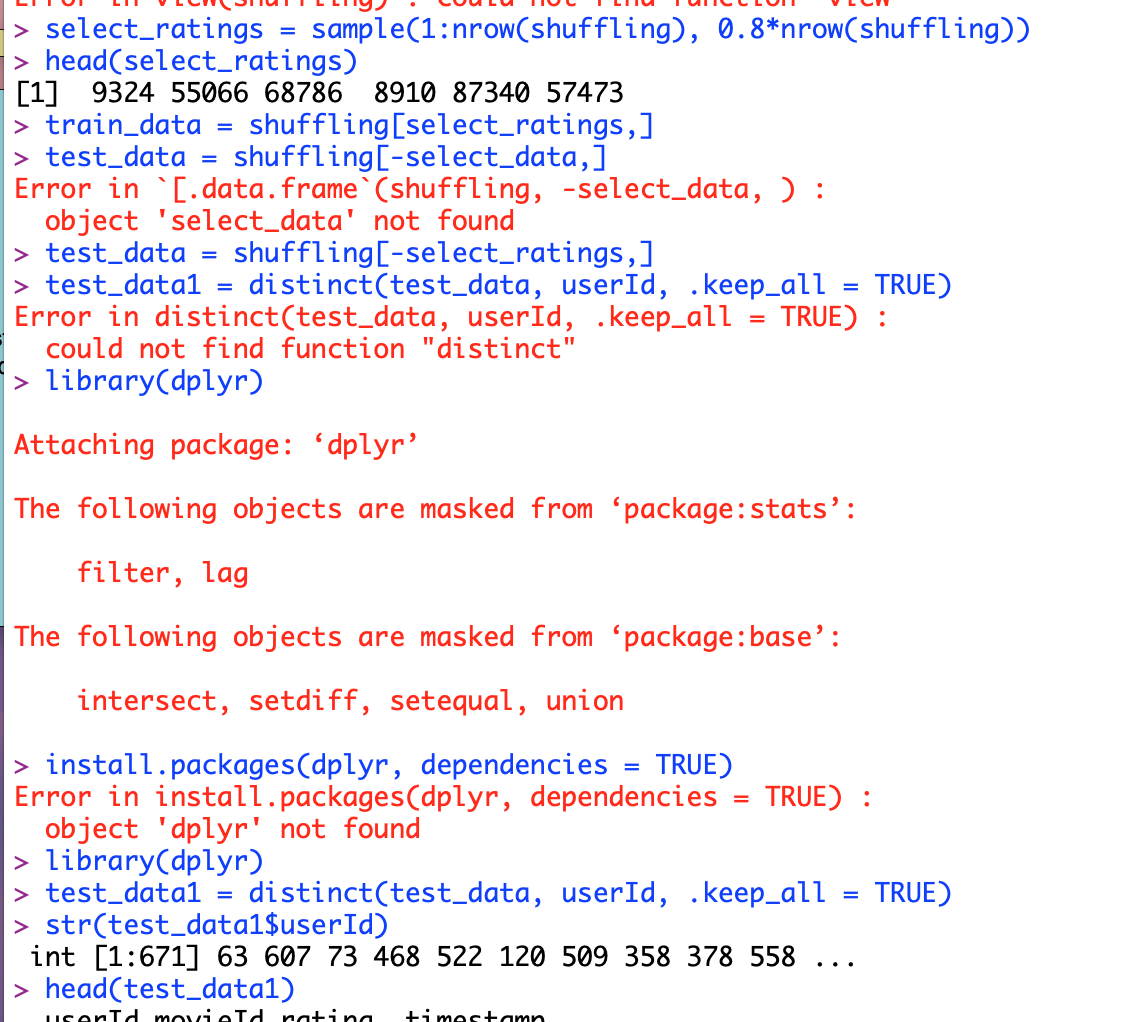

In [52]:
Image(filename='project_images/b.png', width = 600, height = 600)

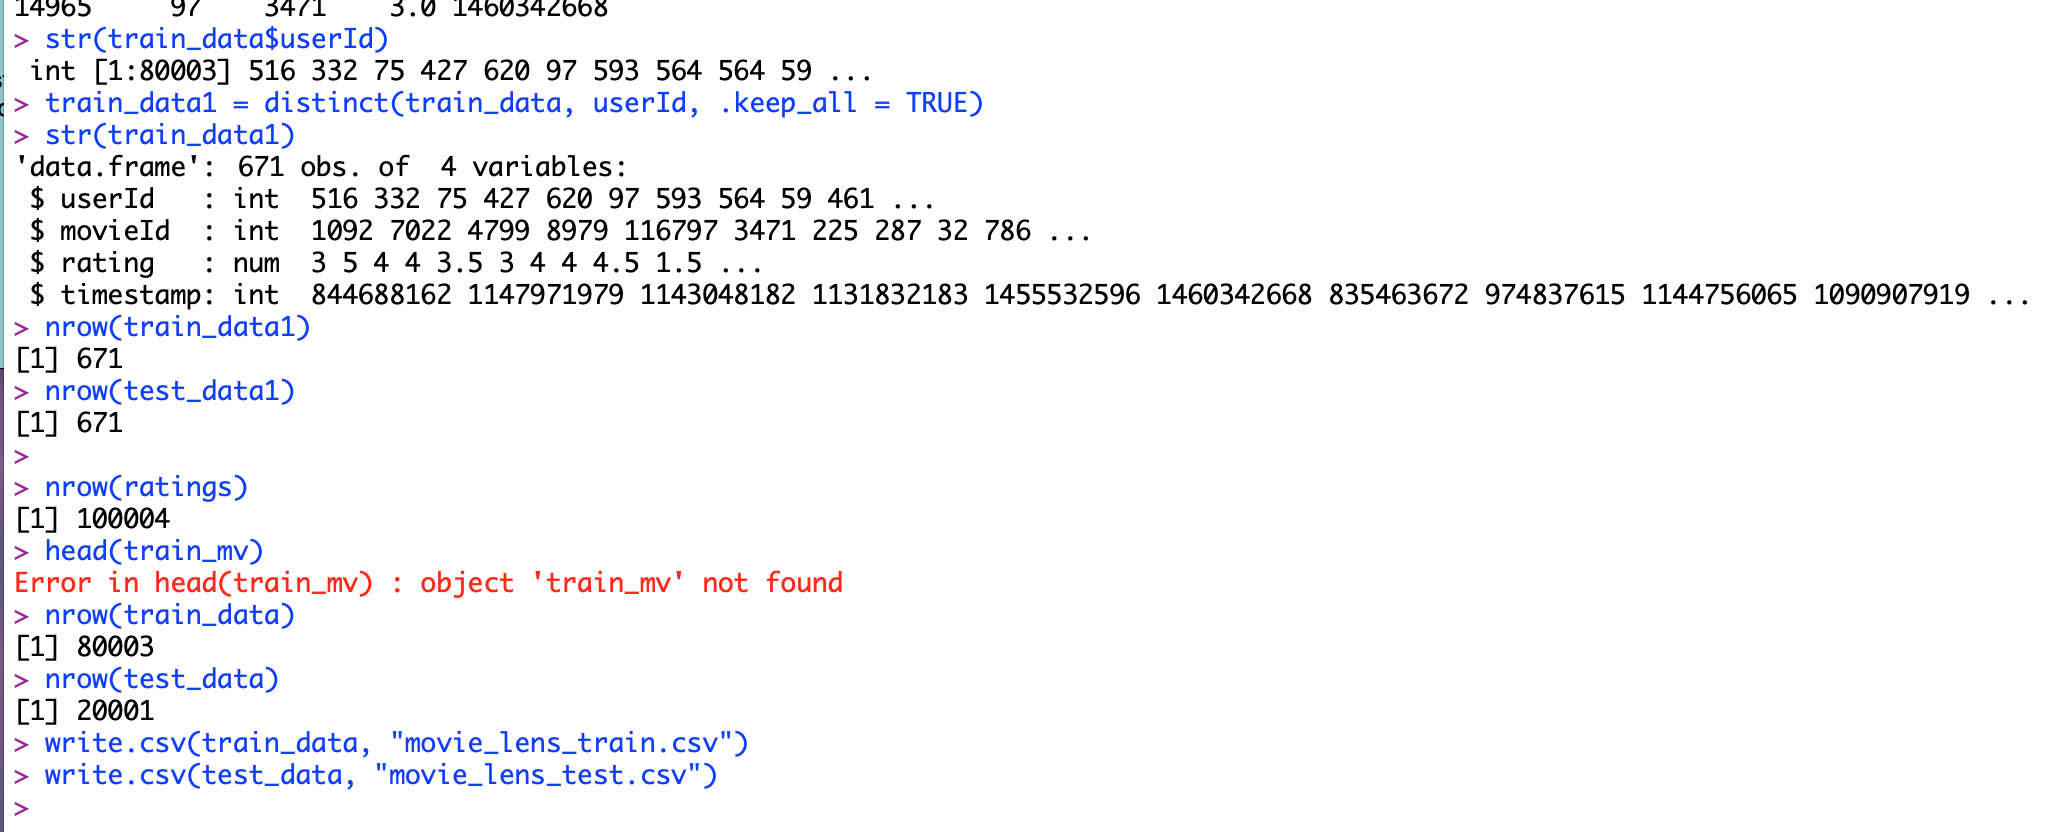

In [56]:
Image(filename='project_images/c.png', width = 900, height = 800)

## Train and Test Data Import after split in R

In [114]:
import pandas as pd 
X_train = pd.read_csv("~/movie_lens_train.csv")
X_test = pd.read_csv("~/movie_lens_test.csv")
X_train.head()
X_test.head()

,Unnamed: 0,userId,movieId,rating,timestamp
0,9419,63,16,5.0,1075307025
1,91703,607,4963,4.5,1113319563
2,10848,73,3967,3.5,1255849638
3,65877,468,1198,3.5,1296195555
4,75168,522,1220,5.0,1391349962


In [74]:
print(X_train.shape, X_test.shape)

(80003, 5) (20001, 5)


### Avoiding Cold Start - All the users existing in Test Data set are present in Training Data Set 

In [242]:
print(X_train.userId.unique().shape, X_test.userId.unique().shape)
# here, we have 
print(X_train.movieId.unique().shape, X_test.movieId.unique().shape)

(671,) (671,)
(8373,) (4889,)


In [76]:
type(X_train)
X_train.head()

,Unnamed: 0,userId,movieId,rating,timestamp
0,74002,516,1092,3.0,844688162
1,46058,332,7022,5.0,1147971979
2,11990,75,4799,4.0,1143048182
3,58935,427,8979,4.0,1131832183
4,93304,620,116797,3.5,1455532596


# Prediction of user's ratings - User Based  - 

## Step1 - Find the User-User similarity using Pearson Correlation Coefficient 

### Pearson Correlation Coefficient 

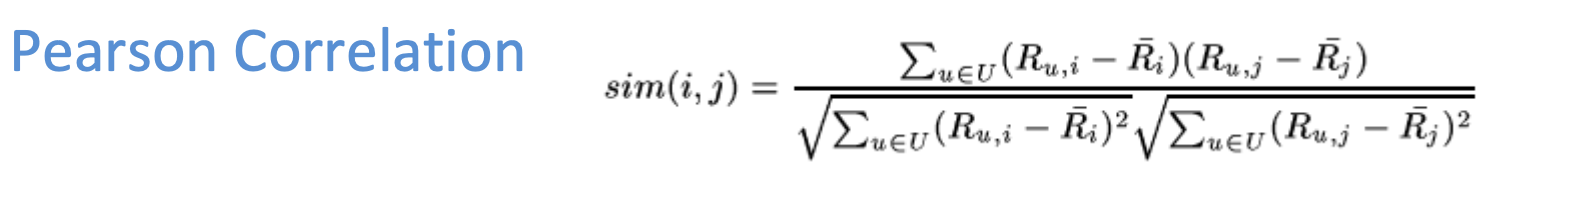

In [332]:
Image(filename='project_images/e.png', width = 800, height = 800)

In [357]:
# This function will find the correlation(similarity) between all the users 
#using Pearson Correlation Coefficient by iterating over all of them and calls find_similarity() method 

def find_pearson_similarity():
    count = 0
    user_similarity_dict = defaultdict(lambda: defaultdict(dict))
    user_movie_dict = defaultdict(lambda : list)
    user_mean_rating=dict()
    outer_loop = 0
    update=0
    for user1_array in np.nditer(unique_users):
        user1, user1_df, user1_mean_rating, user1_rated_movies, user1_rating = get_user_info(user1_array, X_train)
        user_movie_dict[user1] = sorted(user1_rated_movies)
        user_mean_rating[user1]=user1_mean_rating
        outer_loop+=1
        inner_loop = 0
        for user2_array in np.nditer(unique_users):
            count += 1
            inner_loop += 1
            u=user2_array.flat[0]
            if u == user1:
                user_similarity_dict[user1][u] = 1
                user_similarity_dict[u][user1] = 1
                continue
            if not user_similarity_dict[user1][u] and user_similarity_dict[user1][u] != 0:
                 update+=1
                 user2, user2_df, user2_mean_rating, user2_rated_movies, user2_rating = get_user_info(user2_array, X_train)
                 common_movies = list(user1_rated_movies.intersection(user2_rated_movies))
                 sim = find_similarity(common_movies, user1_df, user1_mean_rating, user2_df, user2_mean_rating, count)
                 user_similarity_dict[user1][user2] = sim
                 user_similarity_dict[user2][user1] = sim

    persist_data(user_similarity_dict_file, user_similarity_dict)
    persist_data(user_movie_dict_file, user_movie_dict)
    persist_data(user_mean_rating_file, user_mean_rating)
    return user_similarity_dict, user_movie_dict

# This function finds the similarity(using pearson correlation coefficient) between two individual users  
def find_similarity(common_movies, user1_df, user1_mean_rating, user2_df, user2_mean_rating, count):
    numerator = 0
    denominator_user1 = 0
    denominator_user2 = 0
    for m in common_movies:
        user1_mean_rating_diff = user1_df.loc[user1_df['movieId'] == m]['rating'].item() - user1_mean_rating
        user2_mean_rating_diff = user2_df.loc[user2_df['movieId'] == m]['rating'].item() - user2_mean_rating
        numerator = numerator + (user1_mean_rating_diff * user2_mean_rating_diff)
        denominator_user1 += (user1_mean_rating_diff ** 2)
        denominator_user2 += (user2_mean_rating_diff ** 2)
    final_denominator = math.sqrt(denominator_user1) * math.sqrt(denominator_user2)

    if len(common_movies) == 0 or final_denominator == 0:
        sim = 0
    else:
        sim = numerator / final_denominator
    if count % 1000 == 0:
        print ('sim', sim)
    return sim


# This returns the user's information like- movies rated by user, mean rating given by the user
def get_user_info(user_array, train_test_df):
    user = user_array.flat[0]
    user_df = train_test_df.loc[train_test_df['userId'] == user]
    user_rating = user_df['rating']
    user_mean_rating = np.mean(user_rating)

    user_rated_movies = set(user_df['movieId'])
    return user, user_df, user_mean_rating, user_rated_movies,set(user_rating)

# adds the movie_to_user dict to file -
# contains the movie dict with Key - MovieId Value - List containing [userId, user's rating to movie, user's mean rating]
def group_movie_by_users(df_to_use):
    movie_to_user_dict=defaultdict(lambda: [])
    unique_movies = df_to_use.movieId.unique()
    user_mean_rating = read_file(user_mean_rating_file)
    for movie_array in np.nditer(unique_movies):
        movie_id=movie_array.flat[0]
        df_for_movie = df_to_use.loc[df_to_use['movieId'] == movie_id]
        set_of_users = list(df_for_movie['userId'])
        set_of_rating = list(df_for_movie['rating'])
        for common_user1,rating1 in zip(set_of_users, set_of_rating):
            movie_to_user_dict[movie_id].append((common_user1,rating1,user_mean_rating[str(common_user1).decode("utf-8")]))
    persist_data(movie_to_user_dict_file, movie_to_user_dict)
    return  movie_to_user_dict


#user_similarity_dict,user_movie_dict = find_pearson_similarity()
#movie_to_user_dict = group_movie_by_users(X_train)


### Import all json files 

In [ ]:
import sys
import json
def read_file(filename):
    try:
        with open(filename) as json_file:
            data = json.load(json_file)
            return data
    except:
         e = sys.exc_info()[0]
         print ("error", e)
         return dict()   
            
            
user_similarity = read_file('user_similarity_dict.json')
movie_to_user_dict = read_file('movie_to_user_dict.json')
user_movie_dict=read_file('user_movie_dict.json')
# Key - Movie 
# Value is list of Tuples where Tuple entry is | UserID| Rating given to movie | mean rating for user | 




###  user similarity dict

In [376]:

[v for v in user_similarity_dict.items()][:1]

[('1',
  {'1': 1,
   '2': 0,
   '3': 0,
   '4': 0.04068956314031131,
   '5': -1.0,
   '6': 0,
   '7': -0.031403714651066526,
   '8': 0,
   '9': 1.0,
   '10': 0,
   '11': 0,
   '12': 0,
   '13': 0,
   '14': 0,
   '15': 0.2127186975187268,
   '16': 0,
   '17': -0.9375988721943662,
   '18': 0,
   '19': 0.04022589933545634,
   '20': -1.0,
   '21': -0.8295150620062534,
   '22': 0.22395074485433114,
   '23': 0.018030102133513425,
   '24': 0,
   '25': 1.0,
   '26': 1.0,
   '27': -1.0,
   '28': 0,
   '29': 0,
   '30': -0.3904475275311987,
   '31': 0,
   '32': 0,
   '33': 1.0,
   '34': 0.4472135954999579,
   '35': 0.8116630352540419,
   '36': 0,
   '37': 0,
   '38': 1.0,
   '39': 0,
   '40': 0,
   '41': 0.7682212795973757,
   '42': 0,
   '43': 0.7071067811865476,
   '44': 0,
   '45': 0,
   '46': 0,
   '47': 0,
   '48': -0.4281316738809306,
   '49': -0.5173738748096198,
   '50': 0,
   '51': 0,
   '52': 0,
   '53': 0,
   '54': 0,
   '55': 0,
   '56': -0.16382180392235857,
   '57': 0.8800221726696

### movie_to_user_dict json file

In [378]:
user_rated_movie=movie_to_user_dict['1']
user_rated_movie[1:10]
# Key - MovieId (which is "1" here) 
# Value - UserId, Rating for MovieId 1, Mean Rating given by user

[[553, 4.0, 3.978787878787879],
 [124, 4.5, 3.7285714285714286],
 [15, 2.0, 2.603256846780163],
 [350, 4.0, 3.8814814814814813],
 [128, 5.0, 3.831372549019608],
 [472, 5.0, 3.795216741405082],
 [306, 3.0, 3.4031311154598827],
 [20, 3.5, 3.1666666666666665],
 [345, 4.5, 3.7191011235955056]]

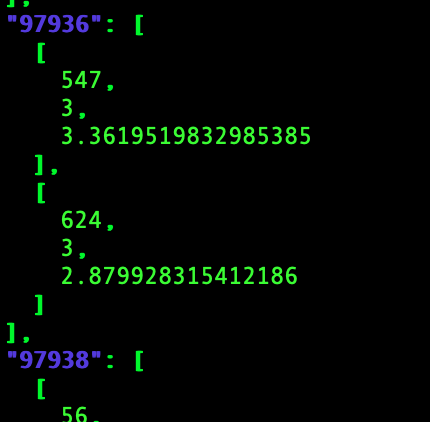

In [339]:
Image(filename='project_images/f.png', width = 300, height = 300)
# Key - MovieId
# Value - List containing [userId, user's rating to movie, user's mean rating

## Step 2: Make Predictions 

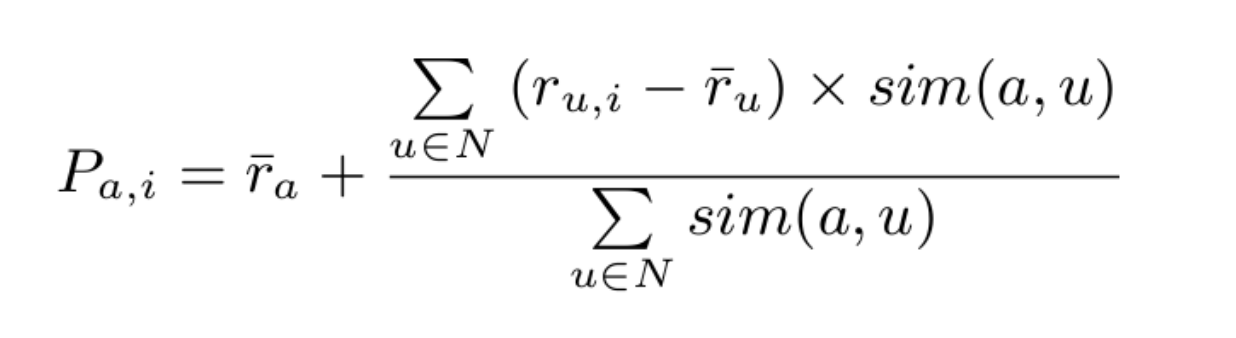

In [190]:
from IPython.display import Image
Image(filename='project_images/d.png', width = 600, height = 600)

In [358]:
def prediction(topK=None, min_sim=0):
    
    user_similarity = read_file('user_similarity_dict.json')
    movie_to_user_dict = read_file('movie_to_user_dict.json')
    mean_user_rating = read_file('user_mean_rating.json')
# filter_df=sample_test[sample_test['userId'].isin(UID_OF_INTEREST)]
    list_tuple=[]
    for row in X_test.iterrows():
        user=row[1]['userId'].item()
        movieId=row[1]['movieId']
#         print(movieId, type(movieId))
        true_rating=row[1]['rating']
        try:
            user_rated_movie=movie_to_user_dict[str(int(movieId))]
        except:
            user_rated_movie=[]
        # users who have rated the movie 
        #print(user_rated_movie)
        num = 0 
        den = 0 
        user_sim = user_similarity[str(int(user))]
        ra = mean_user_rating[str(int(user))] 
        ###### FORMULA IMPLEMENTATION #######
        for row in user_rated_movie:
            required_user = row[0]
            #print('type', type(required_user), type(user))
            rating_user = row[1]
            mean_rating = row[2]
            user_sim_required_user = user_sim[str(int(required_user))]
            if user_sim_required_user > min_sim and required_user != user:
                num += (rating_user-mean_rating)* user_sim_required_user
                den += user_sim_required_user
            else:
                continue
        if len(user_rated_movie) == 0 or den == 0:
            predicted_rating = ra
        else:
            predicted_rating = ra + (num/den)
        list_tuple.append((user,movieId,true_rating, predicted_rating))
    return list_tuple


list_tuple=prediction()
list_tuple[-1]

(428.0, 296.0, 5.0, 4.590284198878607)

In [367]:
# Sorting User_Similarities in Descending Order 
from collections import OrderedDict

# sorted_dict = OrderedDict(sorted_x)
user_sim = user_similarity['1']
        
sorted(user_sim.items(), key=lambda x: x[1], reverse = True)[1:10]



[('9', 1.0),
 ('25', 1.0),
 ('26', 1.0),
 ('33', 1.0),
 ('38', 1.0),
 ('83', 1.0),
 ('87', 1.0),
 ('90', 1.0),
 ('94', 1.0)]

## Step 3:  Accuracy Measures - MAE and RMSE  (with min_sim = 0 and k = None)

In [530]:
from sklearn.metrics import mean_absolute_error
def mae(list_tuple):
    truth = [t[2] for t in list_tuple]
    pred = [t[3] for t in list_tuple]
    truth_array = np.array(truth)
    pred_array = np.array(pred)
    return mean_absolute_error(truth_array, pred_array)

def rmse(list_tuple):
    truth = [t[2] for t in list_tuple]
    pred = [t[3] for t in list_tuple]
    truth_array = np.array(truth)
    pred_array = np.array(pred)
    return np.sqrt(((truth_array - pred_array) ** 2).mean())


print(mae(list_tuple),rmse(list_tuple))

0.6197339958262499 0.8227688385338001


### Scatter Plot 
#### Truth Vs Prediction 

In [379]:
import matplotlib.pyplot as plt
def plot_error(list_tuple):
    truth = [t[2] for t in list_tuple]
    pred = [t[3] for t in list_tuple]



    plt.scatter(truth,pred)
    plt.xlabel("Truth")
    plt.ylabel("Prediction")
    plt.title('Truth Vs Prediction')
    
    plt.show()

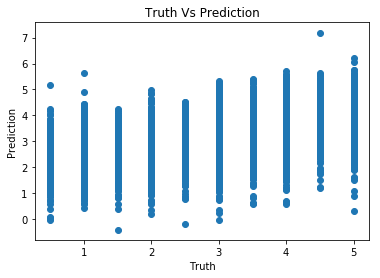

In [539]:
plot_error(list_tuple)

## Violin Plot 

/Users/priyankaagrawal/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


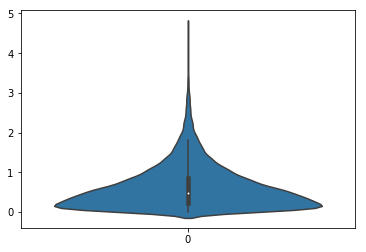

In [538]:
import seaborn as sns

def vodoo(list_tuple):
    error = [abs(t[2]-t[3]) for t in list_tuple]
    ax = sns.violinplot(data=pd.Series(error))
vodoo(list_tuple)

## Accuracy Measures - MAE and RMSE  (with min_sim = 0.4 and k = None)

In [537]:
tuple_min_sim_half=prediction(min_sim=0.4)

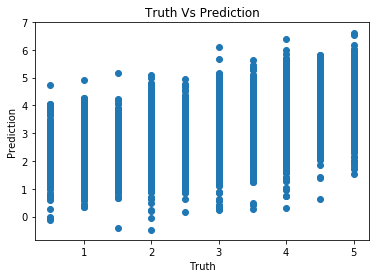

In [380]:
plot_error(tuple_min_sim_half)

## Violin Plot 

In [390]:
# Threshold check - checks if the absolute value of rating diff is greater than or equals threshold value. 

def threshold_check(list_tuple, threshold=2):

    too_much_error=[]
    error=[]
    for t in list_tuple:
         if abs(t[2]-t[3]) >= threshold:
            too_much_error.append(t)
            error.append(abs(t[2]-t[3]))
        

    return len(too_much_error), len(list_tuple),too_much_error[1:10],error
a,b,c,error=threshold_check(tuple_min_sim_half)

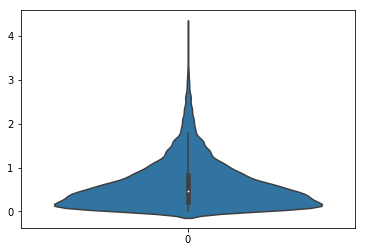

In [534]:
vodoo(tuple_min_sim_half)

### Plot Truth and Predictions

In [536]:
print(mae(tuple_min_sim_half),rmse(tuple_min_sim_half))

0.6058014863964893 0.8079644989410898


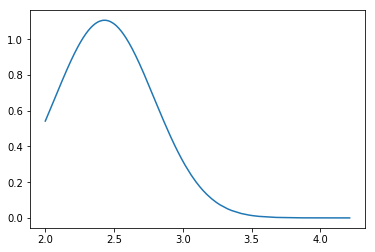

(2.430765882090393, 0.3605732020121445, 4.2136502641089795)

In [395]:
import numpy as np
from scipy.stats import norm
np_error=np.array(error)
e=sorted(error,reverse=True)
np.mean(np_error)
np.std(np_error)
#x=np.linspace(0, 4, len(error))
plt.plot(e, norm.pdf(e, np.mean(np_error), np.std(np_error)))
plt.show()
np.mean(np_error),np.std(np_error), e[0]

In [529]:
def k_prediction(topK=10, min_sim=0):
    
    user_similarity = read_file('user_similarity_dict.json')
    movie_to_user_dict = read_file('movie_to_user_dict.json')
    mean_user_rating = read_file('user_mean_rating.json')
# filter_df=sample_test[sample_test['userId'].isin(UID_OF_INTEREST)]
    list_tuple=[]
    for row in X_test.iterrows():
        user=row[1]['userId'].item()
        movieId=row[1]['movieId']
        true_rating=row[1]['rating']
        sorted_sim_dict=sorted_dict_for_user_sim(user,movieId, topK)
        num = 0 
        den = 0 
        ra = mean_user_rating[str(int(user))]
        #print(sorted_sim_dict)
        ###### FORMULA IMPLEMENTATION #######
        for row in sorted_sim_dict:
            required_user = row
            #print('type', type(required_user), type(user))
            rating_user = sorted_sim_dict[row][1]
            mean_rating = sorted_sim_dict[row][2]
            user_sim_required_user = sorted_sim_dict[row][0]
            if user_sim_required_user > min_sim:
                num += (rating_user-mean_rating)* user_sim_required_user
                den += user_sim_required_user
            else:
                continue
        if den == 0:
            predicted_rating = ra
        else:
            predicted_rating = ra + (num/den)
        list_tuple.append((user,movieId,true_rating, predicted_rating))
    return list_tuple
k_pred=k_prediction()

In [543]:
# This function returns Top K users for the movieId and other information in Tuple - Similarity|Rating|MeanUserRating
import collections
def sorted_dict_for_user_sim(user, movieId, k):
    # Here, we have taken the similarities of all users in the u_sim
    u_sim=user_similarity[str(int(user))]
    try:
        # Here, we get all users who have rated this movie 
        user_of_interest=movie_to_user_dict[str(int(movieId))]
    except:
        # Here, if we have no users who have rated the movie, we return an empty dict() | Cold Start Issue 
         return dict()
    #user_of_interest.discard(user)
    #print(len(user_of_interest), user_of_interest)
    # Here, we find the similarity of the user of interest 
    dict_you_want = { user[0]: (u_sim[str(int(user[0]))],user[1],user[2]) for user in user_of_interest }
    #print(len(dict_you_want),len(u_sim),len(user_of_interst), dict_you_want)
    sorted_x = sorted(dict_you_want.items(), key=lambda kv: kv[1], reverse=True)
    od=OrderedDict(sorted_x[0:k+1])
    od.pop(user,None)
    return od
sorted_dict_for_user_sim(641,31,3)

OrderedDict([(485, (1.0, 4.0, 3.4411764705882355)),
             (386, (0.7076356891384614, 2.0, 2.905263157894737)),
             (1, (0.7071067811865475, 2.5, 2.5))])

## Accuracy Measures - MAE and RMSE  (with min_sim = 0.0 and k = 10)

In [531]:
print(mae(k_pred),rmse(k_pred))

0.5960565769908761 0.7971498672117607


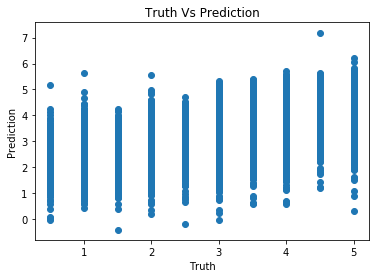

In [532]:
plot_error(k_pred)

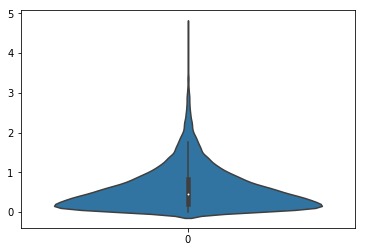

In [540]:
vodoo(k_pred)

In [544]:
threshold_check(k_pred)

20001